In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

pip install --upgrade tensorflow

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.0


In [4]:
dataset = pd.read_csv (r'C:\Users\alfen\Downloads\ML Model\Data Clean.csv')
print (dataset)

    Umur  Gender Tanggal_konfirmasi Tanggal_sembuh  Demam  Batuk  Kelelahan  \
0     44       0         2020-01-21     2020-01-29      1      0          1   
1     39       0         2020-01-24     2020-02-03      1      0          1   
2     30       1         2020-01-15     2020-01-15      1      1          0   
3     66       1         2020-01-23     2020-02-19      1      1          0   
4     40       1         2020-01-25     2020-02-08      1      1          0   
5     33       1         2020-01-27     2020-01-27      1      0          1   
6      1       0         2020-02-08     2020-02-17      0      0          0   
7     30       0         2020-01-24     2020-02-12      1      1          1   
8     31       1         2020-01-24     2020-02-12      1      1          0   
9     29       1         2020-01-24     2020-01-28      0      0          0   
10    55       1         2020-01-24     2020-02-05      1      0          0   
11    73       1         2020-02-02     2020-02-21  

In [16]:
dataset.drop(['Tanggal_konfirmasi', 'Tanggal_sembuh'], axis = 1, inplace = True) 

In [17]:
dataset

,Umur,Gender,Demam,Batuk,Kelelahan,Sakit_tenggorokan,Pilek,Sesak_napas,Muntah,Lama_hari_sembuh
0,44,0,1,0,1,0,0,0,0,8
1,39,0,1,0,1,0,1,0,0,10
2,30,1,1,1,0,1,0,0,0,0
3,66,1,1,1,0,0,0,0,0,27
4,40,1,1,1,0,0,0,0,0,14
5,33,1,1,0,1,1,0,0,0,0
6,1,0,0,0,0,0,0,0,0,9
7,30,0,1,1,1,0,0,0,0,19
8,31,1,1,1,0,0,0,0,0,19
9,29,1,0,0,0,0,0,0,0,4


In [18]:
dataset.isna().sum()

Umur                 0
Gender               0
Demam                0
Batuk                0
Kelelahan            0
Sakit_tenggorokan    0
Pilek                0
Sesak_napas          0
Muntah               0
Lama_hari_sembuh     0
dtype: int64

In [19]:
dataset = dataset.dropna()

Pisahkan data menjadi set pelatihan dan pengujian

In [28]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

Periksa datanya

C:\Users\alfen\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


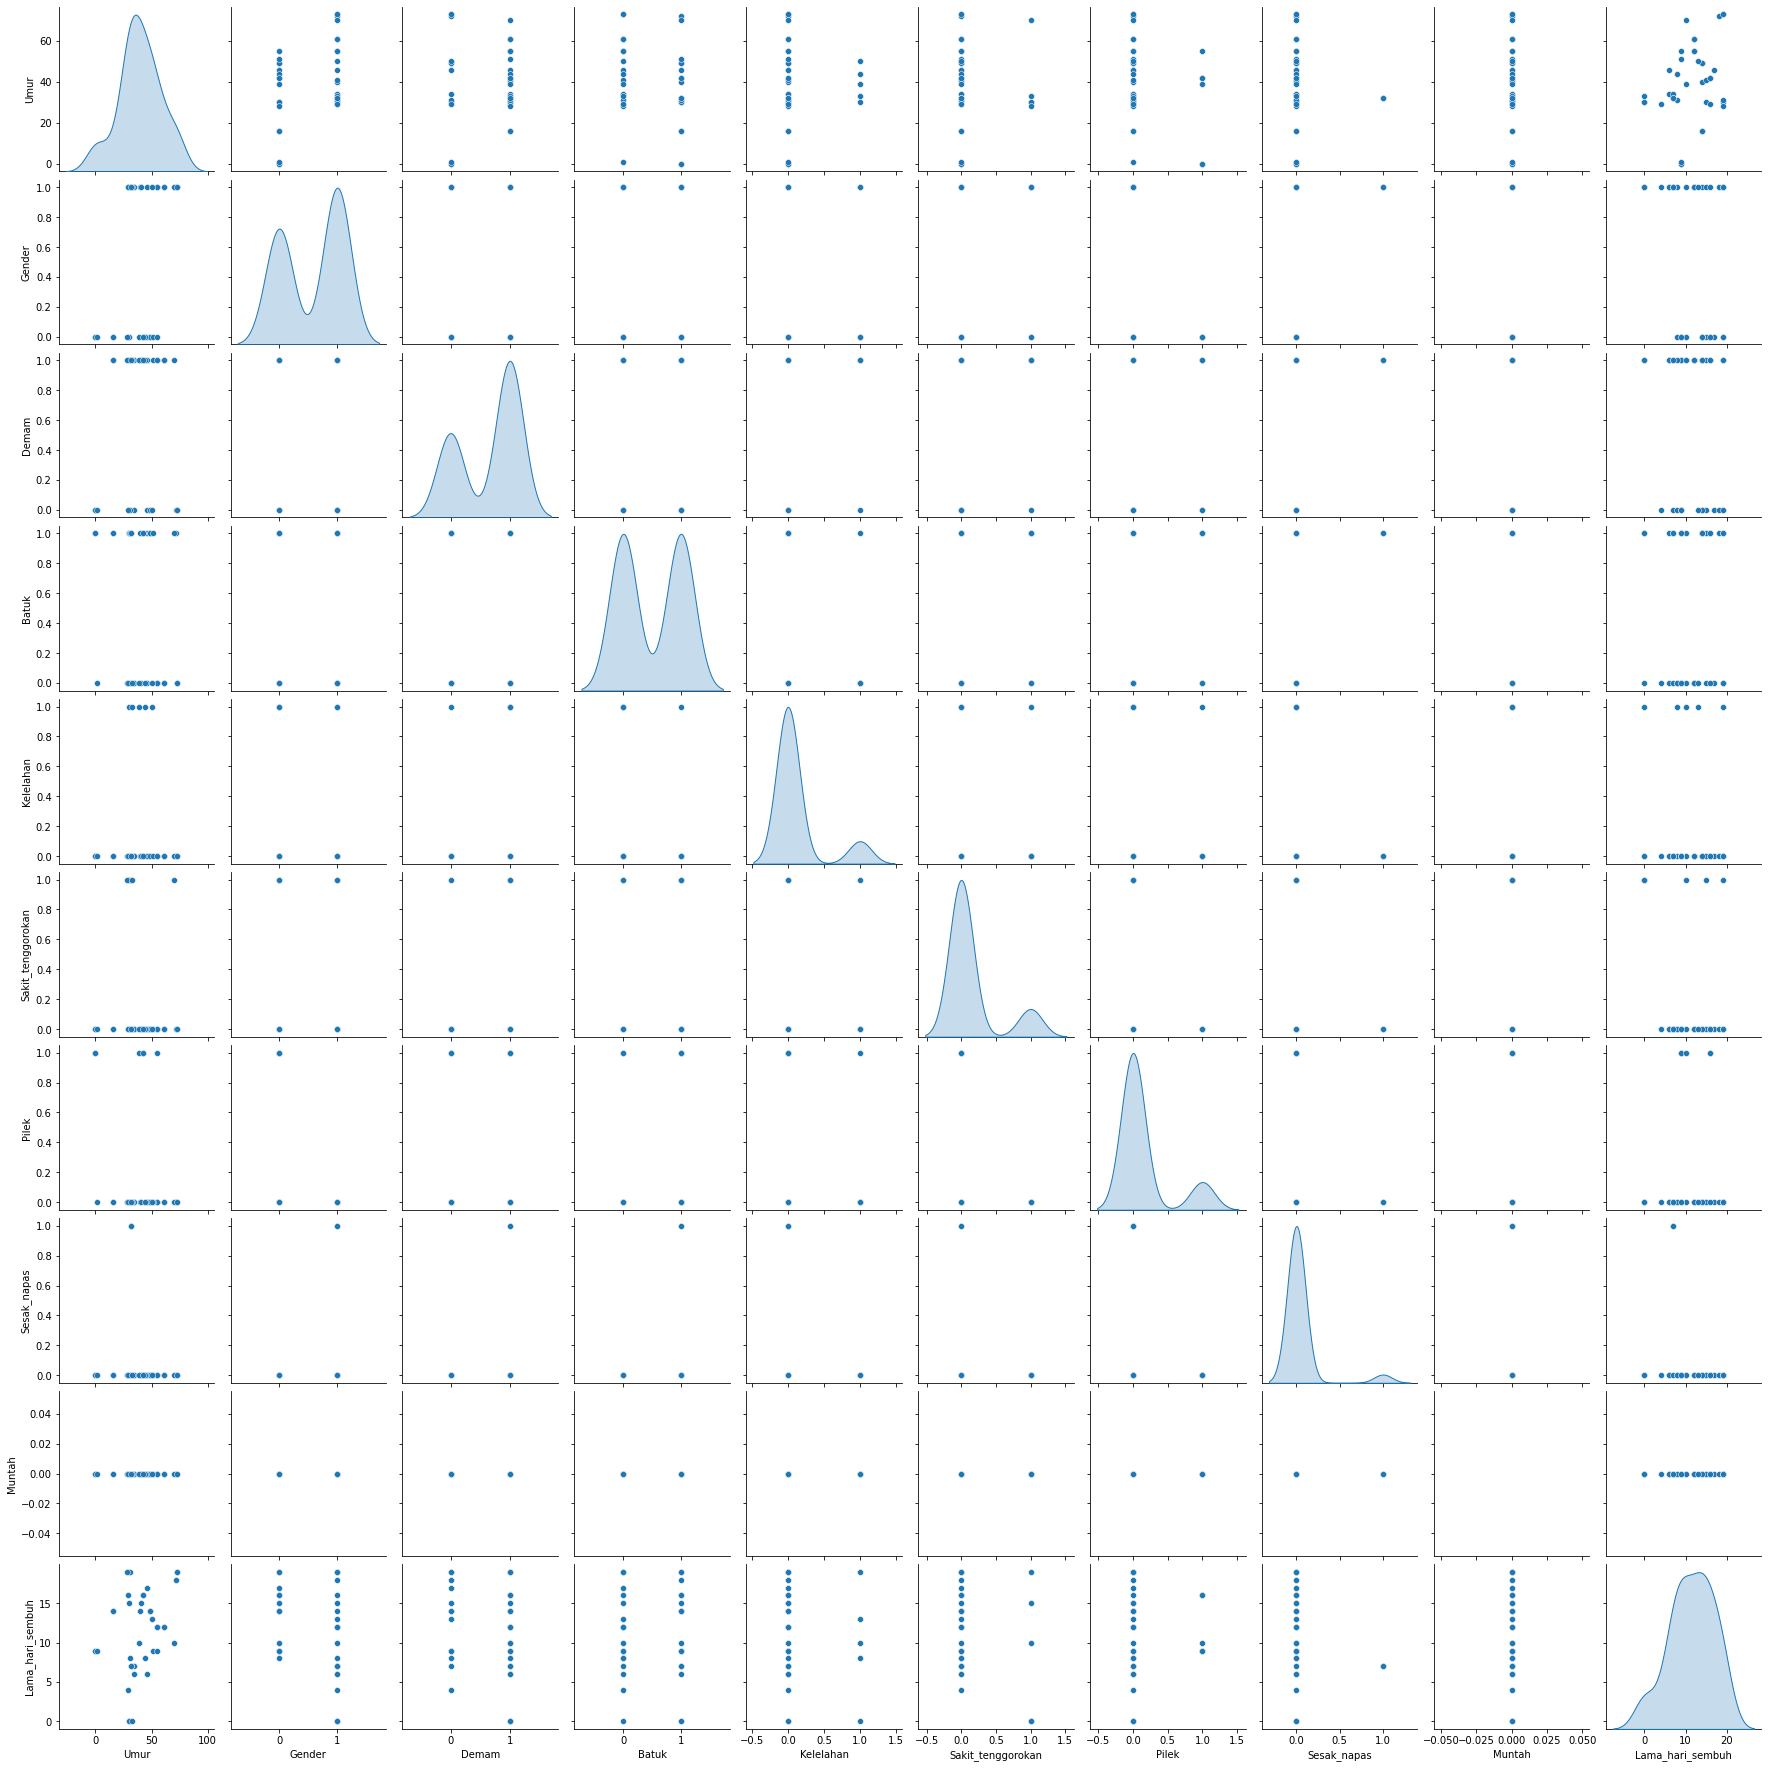

In [22]:
sns.pairplot(train_dataset[['Umur', 'Gender', 'Demam', 'Batuk', 'Kelelahan', 'Sakit_tenggorokan', 'Pilek', 'Sesak_napas', 'Muntah', 'Lama_hari_sembuh']], diag_kind='kde')

Memeriksa statistik keseluruhan

In [23]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Umur,40.0,39.500,18.397324,0.0,30.0,39.5,50.25,73.0
Gender,40.0,0.575,0.500641,0.0,0.0,1.0,1.00,1.0
Demam,40.0,0.650,0.483046,0.0,0.0,1.0,1.00,1.0
Batuk,40.0,0.500,0.506370,0.0,0.0,0.5,1.00,1.0
Kelelahan,40.0,0.125,0.334932,0.0,0.0,0.0,0.00,1.0
Sakit_tenggorokan,40.0,0.150,0.361620,0.0,0.0,0.0,0.00,1.0
Pilek,40.0,0.150,0.361620,0.0,0.0,0.0,0.00,1.0
Sesak_napas,40.0,0.050,0.220721,0.0,0.0,0.0,0.00,1.0
Muntah,40.0,0.000,0.000000,0.0,0.0,0.0,0.00,0.0
Lama_hari_sembuh,40.0,11.425,5.329586,0.0,8.0,12.0,15.25,19.0


Pisahkan fitur dari label

In [29]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Lama_hari_sembuh')
test_labels = test_features.pop('Lama_hari_sembuh')

Normalisasi

In [30]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Umur,39.500,18.397324
Gender,0.575,0.500641
Demam,0.650,0.483046
Batuk,0.500,0.506370
Kelelahan,0.125,0.334932
Sakit_tenggorokan,0.150,0.361620
Pilek,0.150,0.361620
Sesak_napas,0.050,0.220721
Muntah,0.000,0.000000
Lama_hari_sembuh,11.425,5.329586


Lapisan Normalisasi

In [31]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [32]:
normalizer.adapt(np.asarray(train_features))

In [33]:
print(normalizer.mean.numpy())

[[39.5    0.575  0.65   0.5    0.125  0.15   0.15   0.05   0.   ]]


In [34]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[46  1  1  1  0  0  0  0  0]]

Normalized: [[ 0.36  0.86  0.73  1.   -0.38 -0.42 -0.42 -0.23  0.  ]]


Regresi linier

In [35]:
Umur = np.array(train_features['Umur'])

Umur_normalizer = layers.Normalization(input_shape=[1,], axis=None)
Umur_normalizer.adapt(Umur)

Membangun model Keras Sequential

In [36]:
Umur_model = tf.keras.Sequential([
    Umur_normalizer,
    layers.Dense(units=1)
])

Umur_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [45]:
Umur_model.predict(Umur[:10])

1/1 [==============================] - 0s 102ms/step


array([[ 1.195],
       [ 2.048],
       [ 1.479],
       [ 1.29 ],
       [ 0.689],
       [ 0.815],
       [ 1.068],
       [ 1.195],
       [-0.26 ],
       [ 1.005]], dtype=float32)

In [46]:
Umur_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [47]:
%%time
history = Umur_model.fit(
    train_features['Umur'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 6.18 s


In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,4.953034,3.272019,95
96,4.939263,3.257985,96
97,4.925407,3.245251,97
98,4.911472,3.233685,98
99,4.897461,3.223164,99


In [49]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Lama_hari_sembuh]')
  plt.legend()
  plt.grid(True)

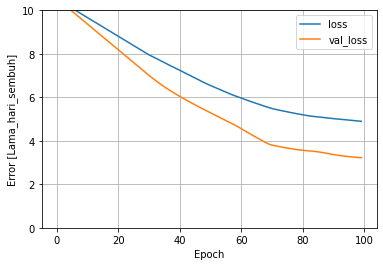

In [50]:
plot_loss(history)

In [51]:
test_results = {}

test_results['Umur_model'] = Umur_model.evaluate(
    test_features['Umur'],
    test_labels, verbose=0)

In [52]:
x = tf.linspace(0.0, 250, 251)
y = Umur_model.predict(x)

8/8 [==============================] - 0s 8ms/step


In [53]:
def plot_Umur(x, y):
  plt.scatter(train_features['Umur'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Umur')
  plt.ylabel('Lama_hari_sembuh')
  plt.legend()

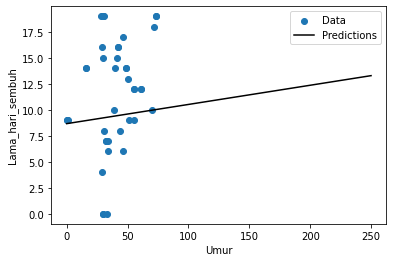

In [54]:
plot_Umur(x, y)

Regresi linier dengan banyak input

In [55]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [56]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 121ms/step


array([[-0.883],
       [-0.451],
       [-0.773],
       [ 0.328],
       [ 0.147],
       [-1.422],
       [ 2.443],
       [ 0.067],
       [ 0.911],
       [-1.068]], dtype=float32)

In [57]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.561],
       [-0.669],
       [ 0.112],
       [ 0.084],
       [ 0.42 ],
       [ 0.544],
       [ 0.749],
       [-0.117],
       [ 0.69 ]], dtype=float32)>

In [58]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [59]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 9.03 s


Menggunakan semua input dalam model regresi ini menghasilkan kesalahan pelatihan dan validasi yang jauh lebih rendah daripada Umur, yang memiliki satu input:

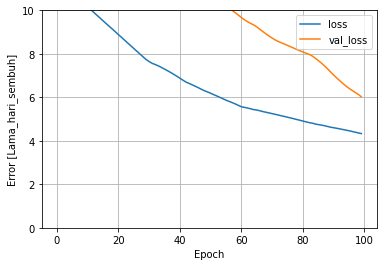

In [61]:
plot_loss(history)

In [62]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

Regresi dengan jaringan saraf dalam (DNN)

In [63]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

Regresi menggunakan DNN dan satu input

In [64]:
dnn_Umur_model = build_and_compile_model(Umur_normalizer)

Model ini memiliki beberapa parameter yang lebih dapat dilatih daripada model linier:

In [65]:
dnn_Umur_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Melatih model dengan Keras Model.fit :

In [66]:
%%time
history = dnn_Umur_model.fit(
    train_features['Umur'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 8.11 s


Model ini sedikit lebih baik daripada Umur input tunggal linier :

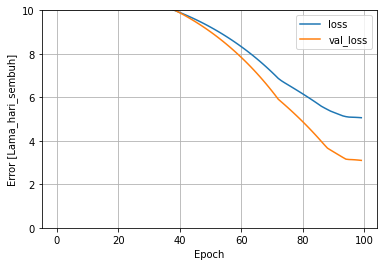

In [67]:
plot_loss(history)

In [70]:
x = tf.linspace(0.0, 100, 101)
y = dnn_Umur_model.predict(x)

4/4 [==============================] - 0s 7ms/step


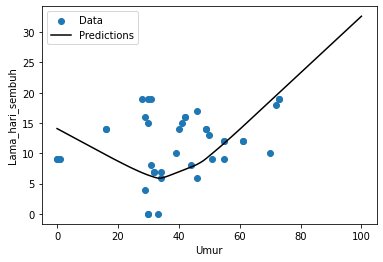

In [71]:
plot_Umur(x, y)

In [72]:
test_results['dnn_Umur_model'] = dnn_Umur_model.evaluate(
    test_features['Umur'], test_labels,
    verbose=0)

Regresi menggunakan DNN dan beberapa input

In [73]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [74]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 8.84 s


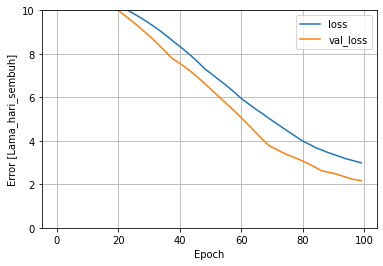

In [75]:
plot_loss(history)

In [76]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

## Performance

In [79]:
pd.DataFrame(test_results, index=['Mean absolute error [Lama_hari_sembuh]']).T

,Mean absolute error [Lama_hari_sembuh]
Umur_model,6.030194
linear_model,8.268040
dnn_Umur_model,5.680704
dnn_model,5.281313


Membuat prediksi dengan dnn_model pada set pengujian menggunakan Keras Model.predict dan meninjau loss:

1/1 [==============================] - 0s 39ms/step


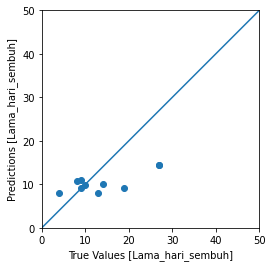

In [83]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Lama_hari_sembuh]')
plt.ylabel('Predictions [Lama_hari_sembuh]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Periksa distribusi kesalahan:

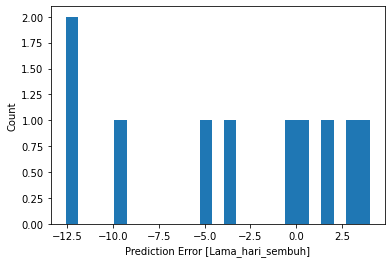

In [84]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Lama_hari_sembuh]')
_ = plt.ylabel('Count')

In [85]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [86]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [87]:
pd.DataFrame(test_results, index=['Mean absolute error [Lama_hari_sembuh]']).T

,Mean absolute error [Lama_hari_sembuh]
Umur_model,6.030194
linear_model,8.268040
dnn_Umur_model,5.680704
dnn_model,5.281313
reloaded,5.281313


In [111]:
#prediction
#give values for 9 columns to predict

Lama_hari_sembuh = dnn_model.predict([15,0,1,1,0,1,1,0,0])
print ("Lama hari sembuh: ",Lama_hari_sembuh)
print ("Lama hari sembuh: ",int(Lama_hari_sembuh))

1/1 [==============================] - 0s 48ms/step
Lama hari sembuh:  [[8.953]]
Lama hari sembuh:  8
